<center>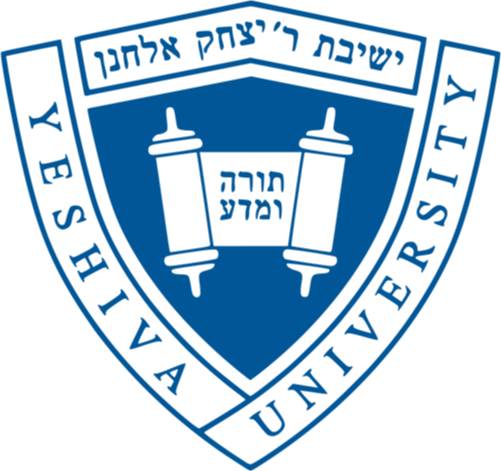</center>

# <center>Katz School of Science and Health</center>
# <center>AIM 5001 Data Acquisition & Management</center>
<p>

# <center>AIM 5001 M12 Assignment</center>
<br><br>

### <center>Radek Jan Holik</center>

#### Importing the necessary libraries

In [403]:
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

# download all of the optional NLTK components that do not get installed by default
# nltk.download('all', halt_on_error=False)

# 1 Introduction

__This work contains work with data on positive and negative reviews of the polarity dataset v.2.0 for sentimental analysis purposes and data preparation for training and testing. Working with data includes loading data from a personal repository on GitHub, and cleaning data including normalization, tokenization, removal of punctuations, splitting, and removal of stopwords. Next, a data frame is created with labels (positive/negative) summarizing the frequency of words in individual reviews. This dataset is converted to a NumPy array for matrix sparsity calculation purposes. The following is a task to plot the 30 most frequented words in both positive and negative reviews. The final part contains the preparation of training and test data in a ratio of 75 to 25 with an even distribution of positive and negative reviews.__

# 2 Data Preparation

## Loding Data

In [404]:
def getNames(url, ext="txt"):
    '''
        Return a list of file names of the text files from the path way.
    '''
    
    response = requests.get(url)
    if response.ok:
        responseText = response.text
    else:
        return response.raise_for_status()
    soup = BeautifulSoup(responseText, 'html.parser')
    parent = [node.get('href').split("/")[-1] for node in soup.find_all('a') if node.get('href').endswith(ext)]
    
    return parent

In [405]:
negUrl = r"https://github.com/rjholik/AIM-5001-Data-Acquisition-Management/tree/main/Module_12/txt_sentoken/neg"
posUrl = r"https://github.com/rjholik/AIM-5001-Data-Acquisition-Management/tree/main/Module_12/txt_sentoken/pos"

In [406]:
negFiles = getNames(negUrl)
posFiles = getNames(posUrl)

print(len(negFiles))
print(len(posFiles))

1000
1000


In [407]:
negFilePath = r"https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module_12/txt_sentoken/neg"
posFilePath = r"https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module_12/txt_sentoken/pos"

## Tokenization, removing punctuations and stop words

In [408]:
def getTextFiles(url, files):
    '''
        Clean Data (load, normalize, tokenize, remove punctuation, split, remove stopwords)
    '''
    
    # Remove punctuations from text data and split the sentence into word-by-word tokens.
    tokenizer = RegexpTokenizer(r'\w+')
        
    # The English language stopwords
    en_stops = set(stopwords.words('english'))
    
    myList = []
    
    for file in files:
        path = url + "/" + file
        
        # Load one txt file
        data = requests.get(path).text
        
        # Convert all characters to lowercase for consistency
        data = data.lower()
        
        # Tokenization
        result = tokenizer.tokenize(data)
        
        # Removing Stopwords
        cleanWords = [word for word in result if word not in en_stops]
        
        myList.append(cleanWords)
        
    return myList

In [409]:
pos = getTextFiles(posFilePath, posFiles)
neg = getTextFiles(negFilePath, negFiles)

## Term-Document Matrix

In [469]:
'''
    Create lists containing word frequencies for individual reviews from both review categories
'''

listTogether = []

for review in pos:    
    # Give the frequency of words within the positive reviews
    rfreq = nltk.FreqDist(review)
    
    # Add a "reviewLabel" element with the value "pos" to each positive record
    rfreq["reviewLabel"] = "pos"
    
    # Add frequency of words to the end of the "listTogether" list
    listTogether.append(rfreq)

for review in neg:
    # Give the frequency of words within the negative reviews
    rfreq = nltk.FreqDist(review)
    
    # Add a "reviewLabel" element with the value "neg" to each negative record
    rfreq["reviewLabel"] = "neg"
    
    # Add frequency of words to the end of the "listTogether" list
    listTogether.append(rfreq)

len(listTogether)

2000

In [470]:
'''
    Finding unique words from both review lists
'''
uniqueWords = list(nltk.FreqDist(sum(pos, []) + sum(neg, [])))
len(uniqueWords)

39545

In [471]:
# Column names
dfHeader = ['reviewLabel'] + uniqueWords

# Creating an empty data frame with the column names
df = pd.DataFrame(columns = dfHeader)

# Append listTogether at the end of df
df = df.append(listTogether)

# Replace NULL values with 0
df.fillna(0, inplace = True)

In [472]:
df

,reviewLabel,film,one,movie,like,even,good,time,story,would,...,lorne,_clueless_,pelvic,butabis,fortenberry,_21_jump_street_,obeys,rift,stonily,_have_
0,pos,5.0,1.0,0.0,4.0,3.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,pos,5.0,1.0,2.0,4.0,6.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,pos,1.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pos,7.0,5.0,4.0,4.0,1.0,0.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,pos,1.0,4.0,4.0,9.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,neg,13.0,7.0,0.0,6.0,3.0,1.0,3.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,neg,6.0,7.0,8.0,7.0,2.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,neg,3.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,neg,3.0,3.0,0.0,3.0,3.0,2.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3 Matrix Sparsity

In [473]:
# Transform dataset df into numpy without the column "reviewLabel"
matrix = df.drop(['reviewLabel'], axis = 1).to_numpy()
matrix

array([[5., 1., 0., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       ...,
       [3., 3., 1., ..., 0., 0., 0.],
       [3., 3., 0., ..., 0., 0., 0.],
       [5., 6., 0., ..., 1., 1., 1.]])

In [474]:
# Array dimensions of matrix
matrix.shape

(2000, 39545)

In [475]:
# Count the number of non-zero values in the array "matrix"
nonZeroElements = np.count_nonzero(matrix)
nonZeroElements

537514

In [476]:
# The number of all elements in the array "matrix"
totalElements = matrix.shape[0] * matrix.shape[1]
totalElements

79090000

In [477]:
# The number of zero elements in array "matrix"
zeroElements = totalElements - nonZeroElements
zeroElements

78552486

In [478]:
# Calculation of the ratio of zero elements to all elements of array "matrix"
matrixSparsity = (zeroElements / totalElements) * 100
print(f'The matrix sparsity is : {np.round(matrixSparsity, 2)}%')

The matrix sparsity is : 99.32%


# 4 Frequency Distribution Plots

In [479]:
'''
    Sum the rows where the review is positive. Sort them and choose the first 30 most frequented words.
'''
top30Pos = df[df['reviewLabel'] == 'pos'].iloc[:,1:].sum().sort_values(ascending = False).iloc[:30]

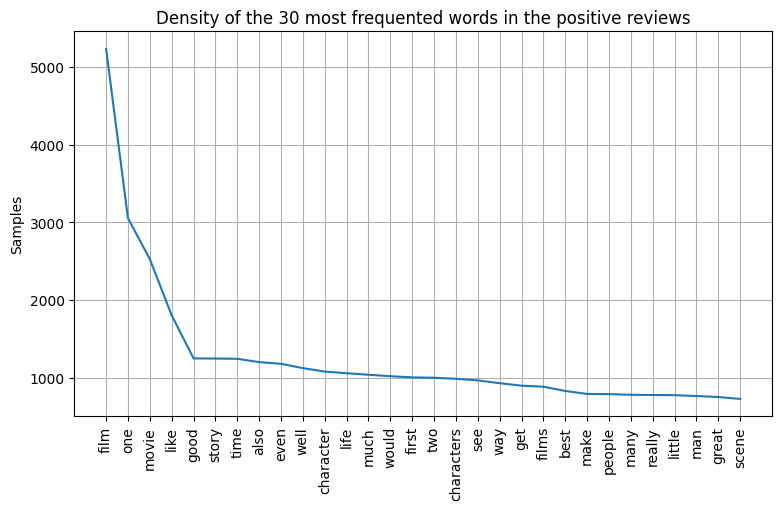

In [480]:
# Plot   
plt.figure(figsize = (9, 5))
plt.plot(top30Pos)
plt.title('Density of the 30 most frequented words in the positive reviews')
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.ylabel('Samples')
plt.grid()
plt.show()

### __It is clear from the above graph that the most frequented words are typically those associated with the film, and they have a neutral character. Sentimental (emotion-tinged) words like "good", "well", "best", or "great" appear only in these 30 most frequented positive reviews.__

In [481]:
'''
    Sum the rows where the review is negative. Sort them and choose the first 30 most frequented words.
'''
top30Neg = df[df['reviewLabel'] == 'neg'].iloc[:,1:].sum().sort_values(ascending = False).iloc[:30]

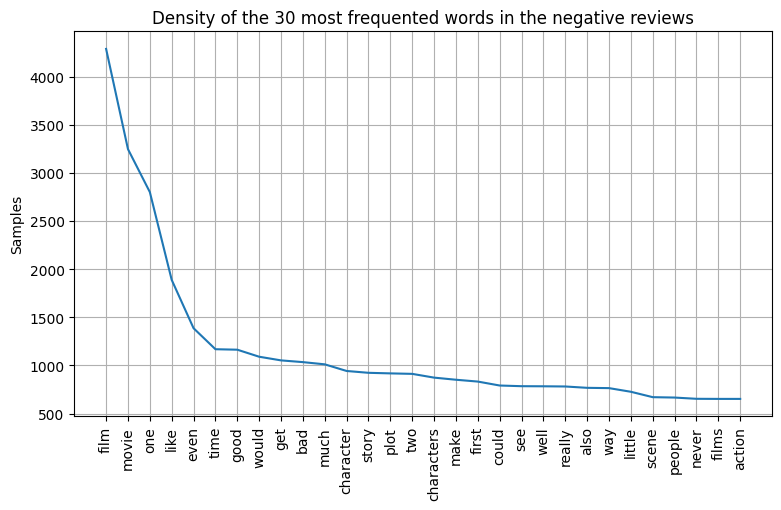

In [482]:
# Plot   
plt.figure(figsize = (9, 5))
plt.plot(top30Neg)
plt.title('Density of the 30 most frequented words in the negative reviews')
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.ylabel('Samples')
plt.grid()
plt.show()

### __Similar to the previous graph, neutral words that are related to the film industry prevail here. The word with a negative sentiment is "bad", the rest are neutral.__

# 5 Sentiment Analysis Model Preparation

In [483]:
# Shuffle 10 times dataframe using sample function 
for _ in range(10):
    df = df.sample(frac = 1)

# Select ratio
ratio = 0.75

In [484]:
totalRows = df.shape[0]
trainSize = int(totalRows * ratio)

In [485]:
# Split data into test and train
trainData = df[0:trainSize]
testData = df[trainSize:]

## Samples of the training subset

### 75% data for training

In [486]:
trainData

,reviewLabel,film,one,movie,like,even,good,time,story,would,...,lorne,_clueless_,pelvic,butabis,fortenberry,_21_jump_street_,obeys,rift,stonily,_have_
706,pos,12.0,2.0,0.0,2.0,1.0,3.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1327,neg,6.0,4.0,3.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1740,neg,3.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1263,neg,5.0,2.0,7.0,1.0,4.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1846,neg,10.0,0.0,6.0,5.0,1.0,3.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,pos,2.0,4.0,4.0,6.0,0.0,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1430,neg,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
630,pos,2.0,5.0,6.0,2.0,0.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
873,pos,12.0,4.0,5.0,0.0,1.0,1.0,5.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [487]:
trainingPosRev = trainData.query("reviewLabel == 'pos'").shape[0]
trainingNegRev = trainData.query("reviewLabel == 'neg'").shape[0]

print(f"{trainingPosRev} positive reviews are contained within the training subset.")
print(f"{trainingNegRev} negative reviews are contained within the training subset.")

748 positive reviews are contained within the training subset.
752 negative reviews are contained within the training subset.


### Percentage ratio

In [488]:
print(f"Percentage of positive reviews : {np.round(trainingPosRev / (trainingPosRev + trainingNegRev) * 100, 2)}%")
print(f"Percentage of negative reviews : {np.round(trainingNegRev / (trainingPosRev + trainingNegRev) * 100, 2)}%")

Percentage of positive reviews : 49.87%
Percentage of negative reviews : 50.13%


## Samples of the testing subset

### 25% data for testing

In [489]:
testData

,reviewLabel,film,one,movie,like,even,good,time,story,would,...,lorne,_clueless_,pelvic,butabis,fortenberry,_21_jump_street_,obeys,rift,stonily,_have_
625,pos,3.0,4.0,9.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950,neg,25.0,4.0,0.0,4.0,9.0,1.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484,pos,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1818,neg,11.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1800,neg,0.0,5.0,2.0,2.0,3.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,neg,4.0,4.0,4.0,3.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,pos,2.0,2.0,1.0,2.0,0.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,pos,3.0,1.0,1.0,3.0,7.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,pos,7.0,5.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [490]:
testingPosRev = testData.query("reviewLabel == 'pos'").shape[0]
testingNegRev = testData.query("reviewLabel == 'neg'").shape[0]

print(f"{testingPosRev} positive reviews are contained within the testing subset.")
print(f"{testingNegRev} negative reviews are contained within the testing subset.")

252 positive reviews are contained within the testing subset.
248 negative reviews are contained within the testing subset.


### Percentage ratio

In [491]:
print(f"Percentage of positive reviews : {np.round(testingPosRev / (testingPosRev + testingNegRev) * 100, 2)}%")
print(f"Percentage of negative reviews : {np.round(testingNegRev / (testingPosRev + testingNegRev) * 100, 2)}%")

Percentage of positive reviews : 50.4%
Percentage of negative reviews : 49.6%


### __In both subsets of the data, it is easy to see that the numbers of positive and negative reviews are balanced. This balance is expressed as a percentage, in both cases very close to 50%.__

# References

- Convert a nested list into a flat list https://www.geeksforgeeks.org/python-convert-a-nested-list-into-a-flat-list/

- Matrix Sparsity Calculation https://stackoverflow.com/questions/38708621/how-to-calculate-percentage-of-sparsity-for-a-numpy-array-matrix

- Splitting data into training and testing https://www.geeksforgeeks.org/how-to-split-data-into-training-and-testing-in-python-without-sklearn/